# Proyek Analisis Data: Air Quality
- **Nama:** Alvin Dzaki Pratama Darmawan
- **Email:** m299b4ky0427@bangkit.academy
- **ID Dicoding:** alvin_dzaki

## Menentukan Pertanyaan Bisnis/Saintifik

- Pertanyaan 1 : Jika NO2 dan SO2 dihasilkan melalui aktivitas industri di jam kerja, maka bagaimana tren relatif dari kadar NO2, SO2 terhadap waktu (Hour), dan di jam berapa variabel tersebut paling tinggi dan paling rendah selama 4 tahun berturut-turut?
Sumber : https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health?gad_source=1&gclid=Cj0KCQjw3bm3BhDJARIsAKnHoVV0xvJ-mGNbfcIU7XvssWbDi7BbYPgLulhmnKe_oCi5VEK0wl5VL4saAvk7EALw_wcB

- Pertanyaan 2 : Gas **CO** dihasilkan melalui reaksi kimiawi pada mesin *kendaraan*, umumnya kendaraan banyak dipakai untuk *aktivitas di pagi dan siang hari*, dan *surut di malam hari*, bagaimana tren relatifnya dan rentang jam dari mana hingga mana nilai CO paling tinggi dan rendah?
Sumber : https://en.wikipedia.org/wiki/Carbon_monoxide#Physical_and_chemical_properties


- Pertanyaan 3 : Gas O3 (Ozone) dapat *dirusak* oleh gas **NO2**, **SO2**, dan **CO**, namun gas **CO** lebih berpengaruh dikarenakan *secara kimiawi* gas **CO** dan **O3** dapat *membentuk* gas **CO2** dan **O2**, sehingga gas **O3** berkaitan dengan variable **CO**, apakah ada hubungan yang proporsional antar keduanya dari tahun ke tahun?
Sumber : https://en.wikipedia.org/wiki/Carbon_monoxide#Role_in_ground_level_ozone_formation


- Pertanyaan 4 : Ukuran partikel yang aman dihirup diukur melalui indeks PM2.5 dan PM10, selama 4 tahun dari 2013 hingga 2017, apakah tingkat indeks tersebut berhubungan erat dengan tiga gas polutan NO2, SO2, dan CO? di tahun berapa tingkat indeks ini paling tinggi?
Sumber : https://ww2.arb.ca.gov/resources/documents/combustion-pollutants-indoor-air-quality#:~:text=Combustion%20pollutants%20are%20the%20gases,(PAHs)%2C%20and%20formaldehyde, https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health#:~:text=PM10%20also%20includes%20dust%20from,pollen%20and%20fragments%20of%20bacteria.

- Pertanyaan 5 : Daerah manakah secara tren menghasilkan gas NO2, SO2, dan CO terbanyak atau terkecil?

## Import Semua Packages/Library yang Digunakan

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Data Wrangling

### Gathering Data

Pertama semua data pada directory Data digabung menggunakan perintah "concat" dengan mengiterasikan semua file yang ada pada folder Data

In [11]:
path = os.getcwd() + '\Data'
os.chdir(path)
print(path)

C:\Users\LENOVO\Downloads\Proj\.ipynb_checkpoints\Data


In [12]:
frames = []
for data in os.listdir(os.getcwd()) :
    df = pd.read_csv(data)
    frames.append(df)
final = pd.concat(frames, ignore_index=True)
print(final)

           No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        

**Insight:**
- Terdapat 420.768 data dan 18 jenis variable

### Assessing Data

- Memeriksa nilai kosong pada data menggunakan perintah "isnull"

In [16]:
final.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Kemudian periksa data duplikat

In [18]:
final.duplicated().sum()

0

- Membuat deskripsi data keseluruhan untuk analisis anomali data

In [20]:
before = final.describe()

In [21]:
final.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- Terdapat cukup banyak data yang hilang secara signifikan pada variable PM2.5, NO2, SO2, dan 03; cukup signifikan untuk variable PM10 dan wd; dan tidak terlalu signifikan untuk TEMP, PRES, DEWP, RAIN,dan WSPM 
- Nilai banding antara maximum dan mean untuk variable PM2.5, PM10, S02, NO2, CO, O3, RAIN dan WSPM "berpotensi" mengandung outlier atau pencilan
- Tidak terdapat data duplikat

### Cleaning Data

- Dikarenakan semua variabel data bersifat kontinu dan cardinal, maka metode interpolasi cocok untuk mengisi data-data NULL

In [25]:
final = final.interpolate(method ='linear', limit_direction ='forward')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13412\2285081810.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  final = final.interpolate(method ='linear', limit_direction ='forward')


In [26]:
final.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64

- Setelah interpolasi, variable wd akan didrop dengan asumsi bahwa arah angin tidak mempengaruhi kadar gas yang berada dekat dengan tanah

In [28]:
final = final.dropna(axis=1)

In [30]:
final.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64

#### Bukti Boxplot (Before Cleaning)

- Untuk membuktikan adanya outlier pada variabel yang terduga, maka dibuatlah plot-plot boxplot berikut untuk masing-masing variabel

Variable PM2.5


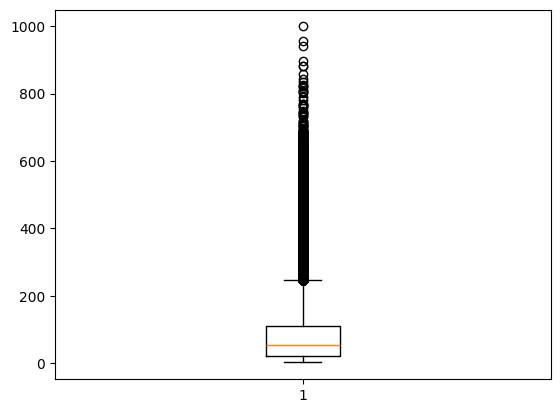

Variable PM10


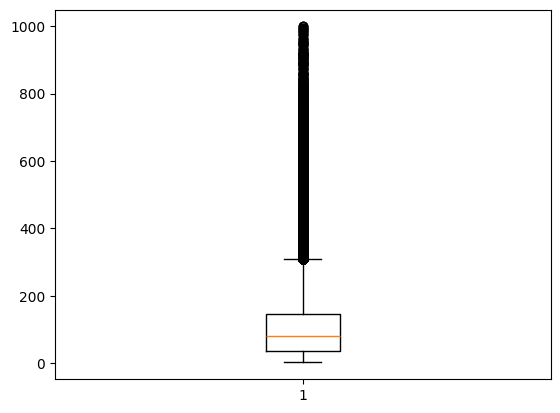

Variable NO2


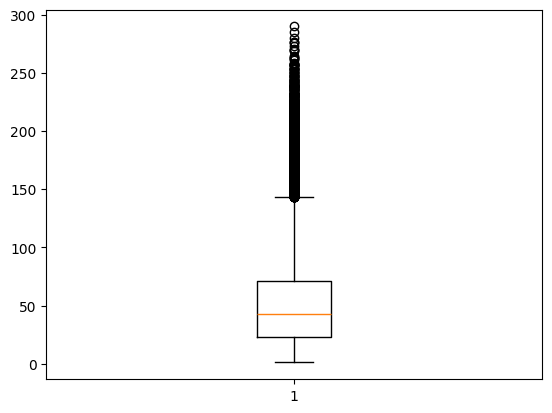

Variable SO2


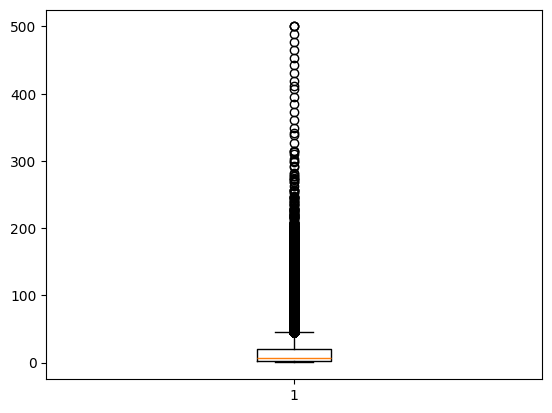

Variable CO


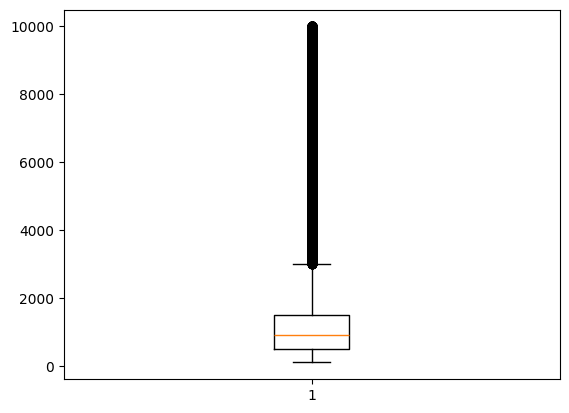

Variable O3


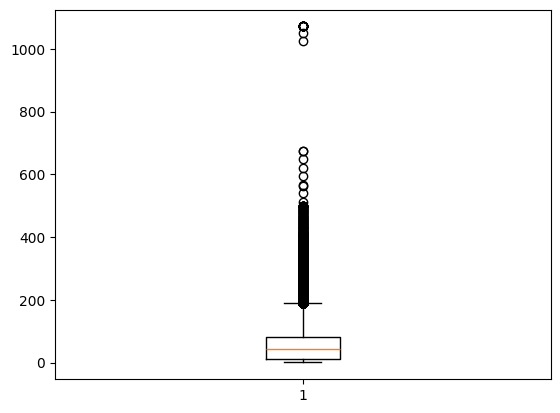

In [34]:
for plot in ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3'] :
    print('Variable {}'.format(plot))
    plt.boxplot(final[plot])
    plt.show()

In [35]:
for var in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN' ,'WSPM'] :
    Q1 = (final[var]).quantile(0.25)
    Q3 = (final[var]).quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5*IQR)
    minimum = Q1 - (1.5*IQR)

    print("{} : Q1 = {}, Q3 = {}, IQR = {}, max = {}, min {}".format(var , Q1, Q3, IQR, maximum, abs(minimum)))
     
    low = final[var] < minimum
    more = final[var] > maximum
     
    final[var].mask(cond=low, other=maximum, inplace=True)
    final[var].mask(cond=more, other=abs(minimum), inplace=True)

PM2.5 : Q1 = 20.0, Q3 = 111.0, IQR = 91.0, max = 247.5, min 116.5
PM10 : Q1 = 36.0, Q3 = 145.0, IQR = 109.0, max = 308.5, min 127.5
SO2 : Q1 = 3.0, Q3 = 20.0, IQR = 17.0, max = 45.5, min 22.5
NO2 : Q1 = 23.0, Q3 = 71.0, IQR = 48.0, max = 143.0, min 49.0
CO : Q1 = 500.0, Q3 = 1500.0, IQR = 1000.0, max = 3000.0, min 1000.0
O3 : Q1 = 10.0, Q3 = 82.0, IQR = 72.0, max = 190.0, min 98.0
RAIN : Q1 = 0.0, Q3 = 0.0, IQR = 0.0, max = 0.0, min 0.0
WSPM : Q1 = 0.9, Q3 = 2.2, IQR = 1.3000000000000003, max = 4.15, min 1.0500000000000003


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13412\361474656.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final[var].mask(cond=low, other=maximum, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13412\361474656.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


#### Bukti Boxplot (After Cleaning)

Variable PM2.5


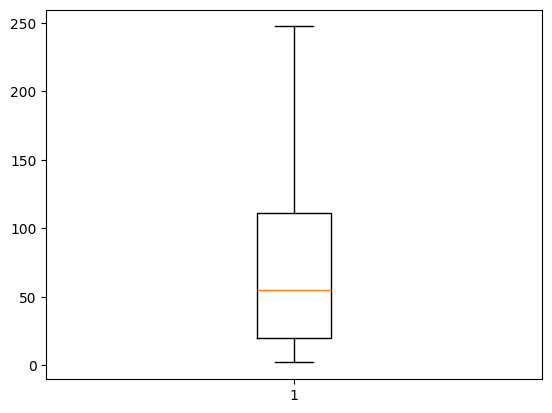

Variable PM10


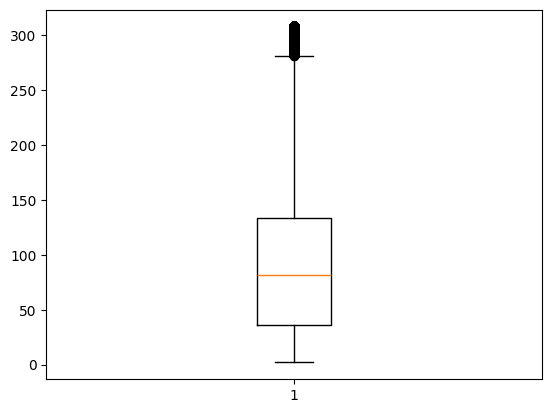

Variable NO2


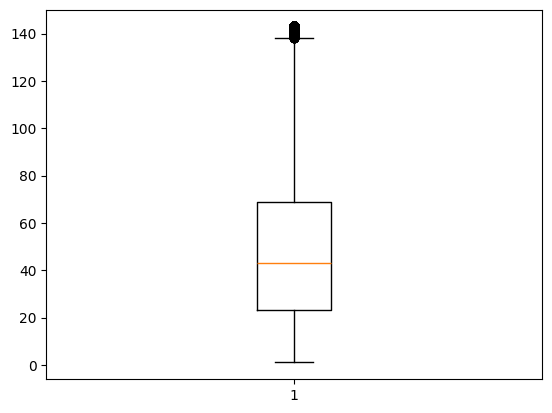

Variable SO2


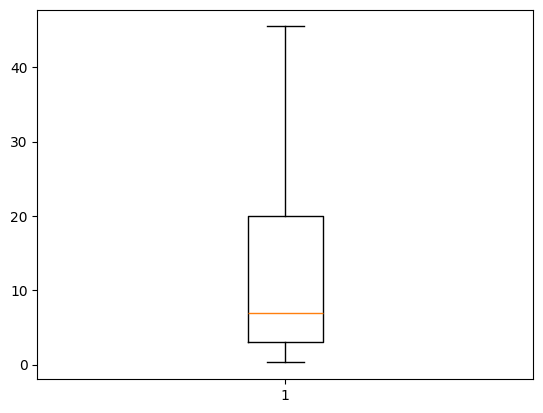

Variable CO


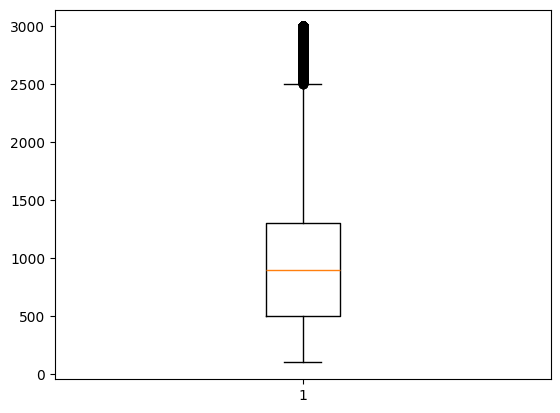

Variable O3


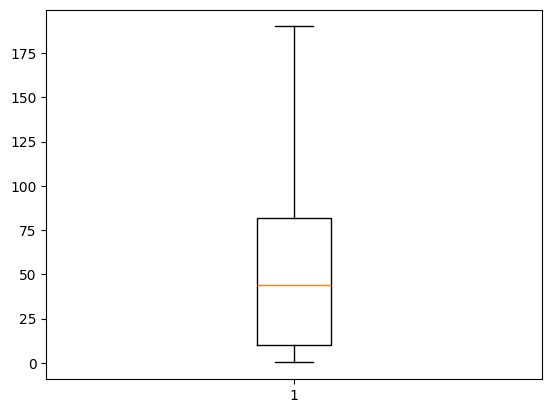

In [37]:
for plot in ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3'] :
    print('Variable {}'.format(plot))
    plt.boxplot(final[plot])
    plt.show()

- Bisa dilihat setelah pembersihan, diagram boxplot untuk masing-masing variabel terduga bisa dikatakan sudah cukup normal dibandingkan sebelumnya. Data-data sisa yang masih menjadi outlier dapat kita abaikan saja, dengan asumsi bahwa data-data tersebut muncul karena aktivitas pabrik atau lalu lintas yang tidak biasa di suatu waktu, serta faktor jumlah populasi masyarakat China yang bisa dikatakan sangat padat penduduk.

Sumber : https://neuraldatascience.io/5-eda/data_cleaning.html

In [40]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  WSPM     420768 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(1)
memory usage: 54.6+ MB


In [99]:
final.describe()
final.to_csv((os.getcwd() + "\AllDat.csv"), encoding='utf-8', index=False)

**Insight:**
- Data NULL yang signifikan pada beberapa variable bisa dikarenakan kesalahan teknis pada sensor ataupun kesalahan humanis pada operator
- Data outlier ekstrim sebelum pembersihan bisa dikarenakan kesalahan input data oleh operator ataupun sensor yang belum dikalibrasi
- Data outlier setelah pembersihan bisa dikarenakan aktivitas pabrik dan lalu lintas di China yang tidak seperti biasanya, yang dipengaruhi oleh berbagai banyak faktor, salah satunya adalah jumlah penduduk yang padat.

## Exploratory Data Analysis (EDA)

In [48]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

### EDA Pertanyaan 1 & 2

- Sesuai pertanyaan 1 dan 2, data NO2, SO2, dan CO dikelompokan sesuai tahun dan jam untuk mencari tren keseluruhan

In [24]:
final.groupby(["year","hour"])[['NO2', 'SO2', 'CO']].mean()

NameError: name 'final' is not defined

### EDA Pertanyaan 3

- Sesuai pertanyaan 3, data CO dan O3 dikelompokan sesuai tahun untuk mencari tren per tahunnya

In [101]:
final.groupby(["year"])[['CO','O3']].mean()

,CO,O3
year,,
2013,1074.953967,51.459352
2014,1025.931098,52.352173
2015,961.696077,53.483067
2016,924.445127,52.369686
2017,973.779818,39.851695


### EDA Pertanyaan 4 

- Sesuai pertanyaan 4, data NO2, SO2, CO, PM2.5, dan PM10 dikelompokan sesuai tahun dan bulan untuk mencari tren relatif antara polutan dan partikulat

In [36]:
final.groupby(["year","month"])[['NO2','SO2','CO','PM2.5','PM10']].mean()

NameError: name 'final' is not defined

### EDA Pertanyaan 5 (NO2)

- Sesuai pertanyaan 5, setiap gas polutan dikelompokkan sesuai tahun dan stasiun untuk mencari rangking antar stasiun

In [60]:
final.groupby(["year","station"])[['NO2']].mean().sort_values(['year','NO2'], ascending=False)

NO2
year station                 
2017 Wanliu         61.493997
     Aotizhongxin   59.508475
     Guanyuan       59.486582
     Tiantan        59.426907
     Wanshouxigong  57.999294
...                       ...
2013 Tiantan        51.961961
     Shunyi         41.121158
     Changping      40.401188
     Huairou        34.517787
     Dingling       28.393317

[60 rows x 1 columns]

### EDA Pertanyaan 5 (SO2)

In [63]:
final.groupby(["year","station"])[['SO2']].mean().sort_values(['year','SO2'], ascending=False)

SO2
year station                
2017 Shunyi        16.526836
     Gucheng       16.368997
     Wanliu        16.319915
     Aotizhongxin  15.955862
     Dongsi        15.858757
...                      ...
2013 Tiantan       12.996164
     Huairou       12.543252
     Gucheng       12.444319
     Dingling      10.908924
     Shunyi        10.845286

[60 rows x 1 columns]

### EDA Pertanyaan 5 (CO)

In [66]:
final.groupby(["year","station"])[['CO']].mean().sort_values(['year','CO'], ascending=False)

CO
year station                   
2017 Gucheng        1062.676554
     Tiantan        1014.583333
     Wanshouxigong  1014.300847
     Wanliu         1006.920904
     Shunyi          993.220339
...                         ...
2013 Aotizhongxin   1035.407067
     Guanyuan       1017.630480
     Huairou         946.566653
     Changping       942.718273
     Dingling        915.744485

[60 rows x 1 columns]

**Insight:**
- Kadar NO2, SO2, dan CO cenderung turun di sore hari [EDA Pertanyaan 1 & 2]
- Kadar O3 konsisten/proportional terhadap kadar CO di udara dari tahun ke tahun [EDA Pertanyaan 3]
- Index PM2.5 dan PM10 konsisten/proportional terhadap kadar NO2, SO2, CO dari tahun ke tahun [EDA Pertanyaan 4]
- Daerah Wanliu menjadi penghasil gas NO2 terbesar dan Dingling penghasil terkecil selama 4 tahun berturut-turut [EDA Pertanyaan 5]
- Daerah Wanliu menjadi penghasil gas SO2 terbesar selama 2 tahun berturut-turut, namun disusul oleh Dongsi, Guanyuan, dan Shunyi di tahun berikutnya [EDA Pertanyaan 5]
- Shunyi dan Dingling menjadi penghasil SO2 terkecil di tahun 2013 dan 2014, namun tahun berikutnya Huairou menjadi penghasil terkecil selama 3 tahun berturut-turut [EDA Pertanyaan 5]
- Di tahun pertama Dongsi menjadi penghasil CO terbesar, namun disusul oleh Wanshouxigong di tahun berikutnya, tapi menjadi penghasil terbanyak kembali selama dua tahun sebelum disusul oleh Gucheng di 2017 [EDA Pertanyaan 5]
- Dingling menjadi penghasil CO terkecil selama 4 tahun berturut-turut [EDA Pertanyaan 5]

## Visualization & Explanatory Analysis

### Pertanyaan 1 :

- Pertanyaan 1 divisualkan menggunakan line chart untuk mengetahui arah tren relatif antara Hour dan gas polutan

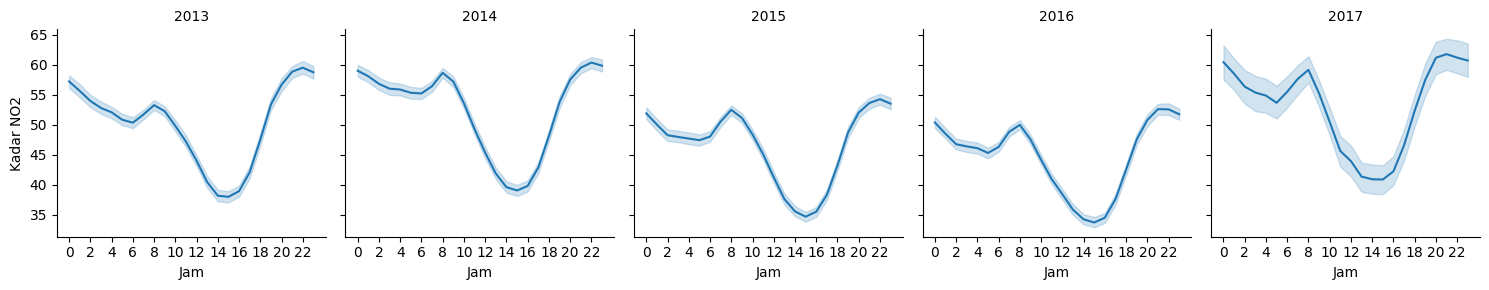

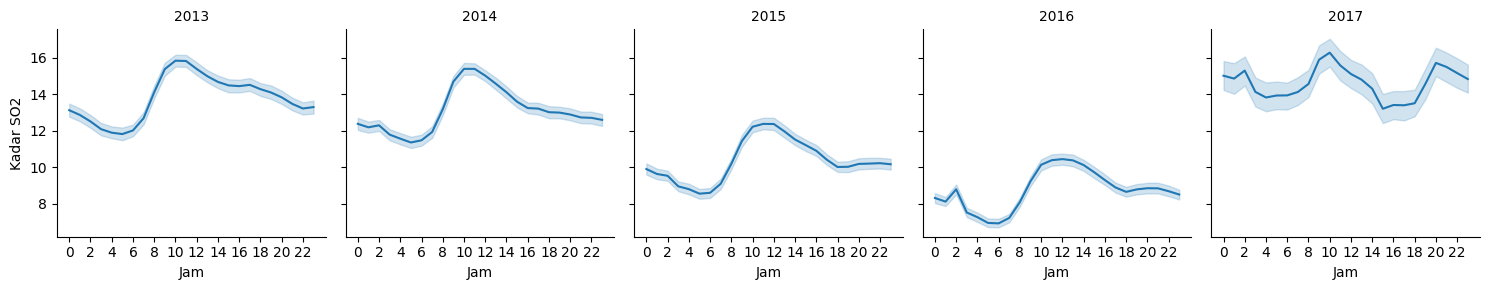

In [71]:
for var in  ['NO2','SO2'] :
    g = sns.FacetGrid(final, col='year')
    g.map_dataframe(sns.lineplot, x='hour', y=var)
    g.set(xticks=np.arange(0,23,2))
    g.set_xticklabels(np.arange(0,23,2))
    g.set_axis_labels('Jam', 'Kadar {}'.format(var))
    g.set_titles(col_template='{col_name}')
    plt.show()

### Pertanyaan 2:

- Pertanyaan 2 divisualkan menggunakan line chart untuk mengetahui arah tren relatif antara Hour dan CO

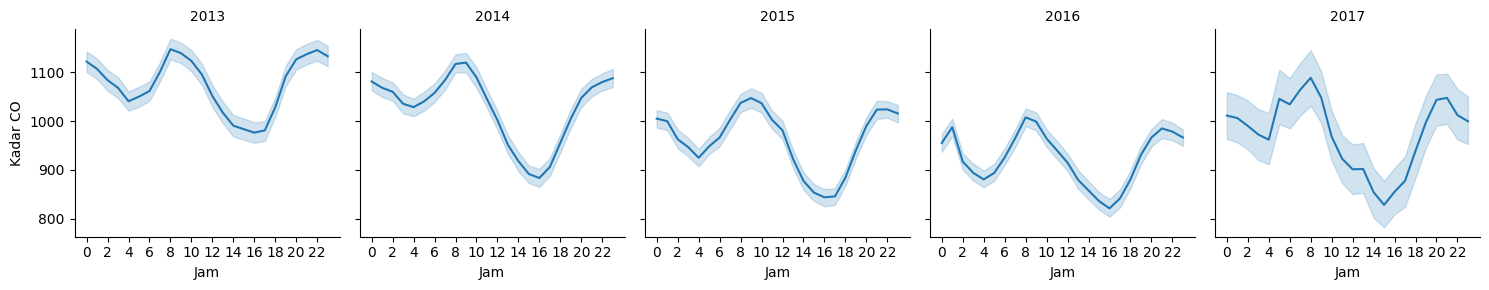

In [73]:
g = sns.FacetGrid(final, col='year')
g.map_dataframe(sns.lineplot, x='hour', y='CO')
g.set(xticks=np.arange(0,23,2))
g.set_xticklabels(np.arange(0,23,2))
g.set_axis_labels('Jam', 'Kadar CO')
g.set_titles(col_template='{col_name}')
plt.show()

### Pertanyaan 3:

- Pertanyaan 3 divisualkan menggunakan line chart untuk mengetahui arah tren relatif antara CO dan O3

               CO         O3
year                        
2013  1074.953967  51.459352
2014  1025.931098  52.352173
2015   961.696077  53.483067
2016   924.445127  52.369686
2017   973.779818  39.851695


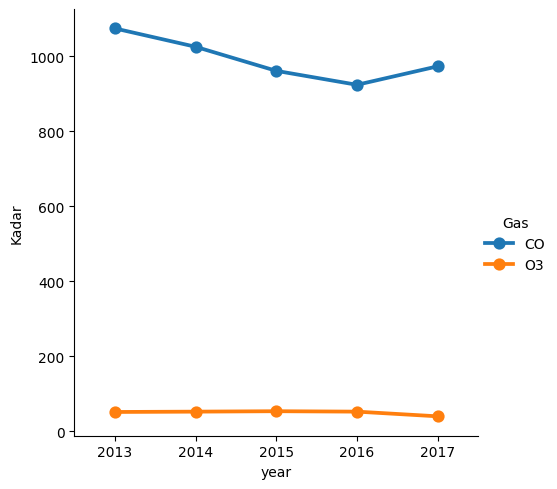

In [75]:
gas = final.groupby('year')[['CO','O3']].mean()

print(gas)

gas = gas.reset_index()
gas = pd.melt(
    gas, 
    id_vars=['year'], 
    value_vars=('CO','O3'), 
    var_name='Gas', 
    value_name='Kadar', 
    col_level=None
)

g = sns.catplot(x="year", y="Kadar", hue='Gas', data=gas, kind='point')


plt.show()

### Pertanyaan 4:

- Agar hubungan antara variable PM2.5 dan PM10 dengan NO2, SO2, dan CO menjadi jelas, maka data akan dikelompokan dalam tahun, dimana tiap bulan memiliki nilai rata-rata kadar NO2,SO2,dan CO serta rata-rata nilai index PM2.5 dan PM10

- Pertanyaan 4 divisualkan dengan scatter plot agar terlihat proporsi dan linearitas antar gas polutan dan partikulat

    year  month        NO2        SO2           CO      PM2.5        PM10
0   2013      3  60.117894  19.228524  1227.461302  88.414539  112.960502
1   2013      4  45.687890  15.179902   876.494929  61.738079   95.069242
2   2013      5  49.276428  18.427094   982.101794  77.947245  127.958230
3   2013      6  47.239413  11.715686  1242.905914  93.078759  110.687902
4   2013      7  38.660582   7.154695   968.464037  66.550350   75.871475
..   ...    ...        ...        ...          ...        ...         ...
43  2016     10  52.368168   4.317574  1113.967294  78.970901   98.600470
44  2016     11  63.808218  10.834456  1260.260417  87.386400  115.031134
45  2016     12  68.808468  15.708277  1231.694295  90.342854  112.296595
46  2017      1  56.269769  15.284890  1016.028226  77.854592   96.063508
47  2017      2  49.468626  13.902902   927.004795  59.314112   80.426711

[48 rows x 7 columns]
    year  month        NO2 Partikulat       Index
0   2013      3  60.117894      PM2.5  

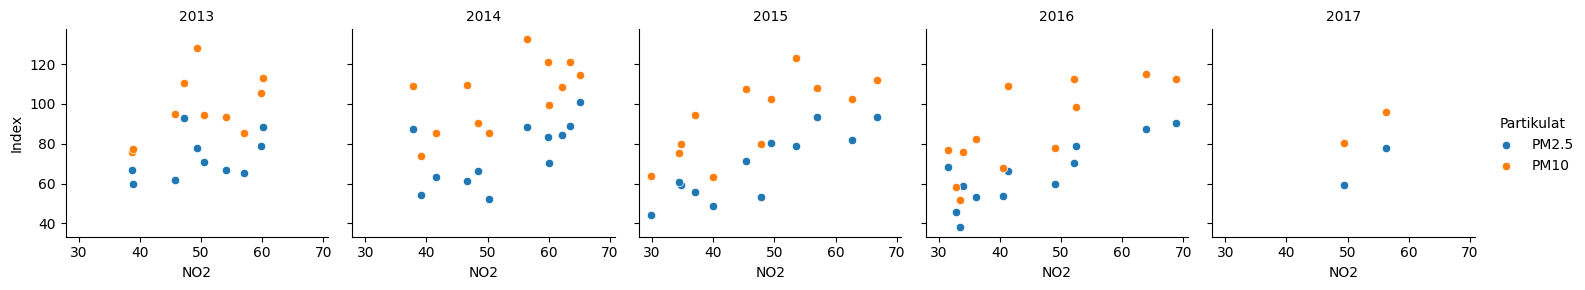

    year  month        SO2 Partikulat       Index
0   2013      3  19.228524      PM2.5   88.414539
1   2013      4  15.179902      PM2.5   61.738079
2   2013      5  18.427094      PM2.5   77.947245
3   2013      6  11.715686      PM2.5   93.078759
4   2013      7   7.154695      PM2.5   66.550350
..   ...    ...        ...        ...         ...
91  2016     10   4.317574       PM10   98.600470
92  2016     11  10.834456       PM10  115.031134
93  2016     12  15.708277       PM10  112.296595
94  2017      1  15.284890       PM10   96.063508
95  2017      2  13.902902       PM10   80.426711

[96 rows x 5 columns]


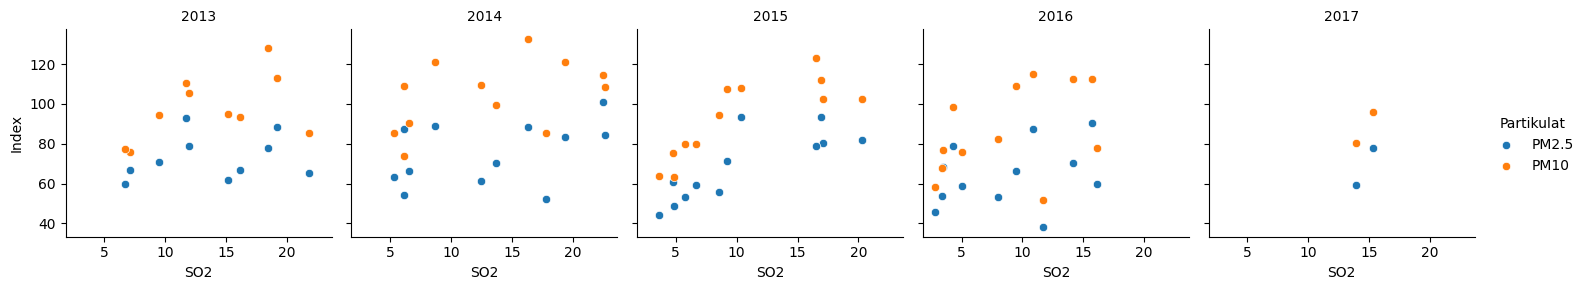

    year  month           CO Partikulat       Index
0   2013      3  1227.461302      PM2.5   88.414539
1   2013      4   876.494929      PM2.5   61.738079
2   2013      5   982.101794      PM2.5   77.947245
3   2013      6  1242.905914      PM2.5   93.078759
4   2013      7   968.464037      PM2.5   66.550350
..   ...    ...          ...        ...         ...
91  2016     10  1113.967294       PM10   98.600470
92  2016     11  1260.260417       PM10  115.031134
93  2016     12  1231.694295       PM10  112.296595
94  2017      1  1016.028226       PM10   96.063508
95  2017      2   927.004795       PM10   80.426711

[96 rows x 5 columns]


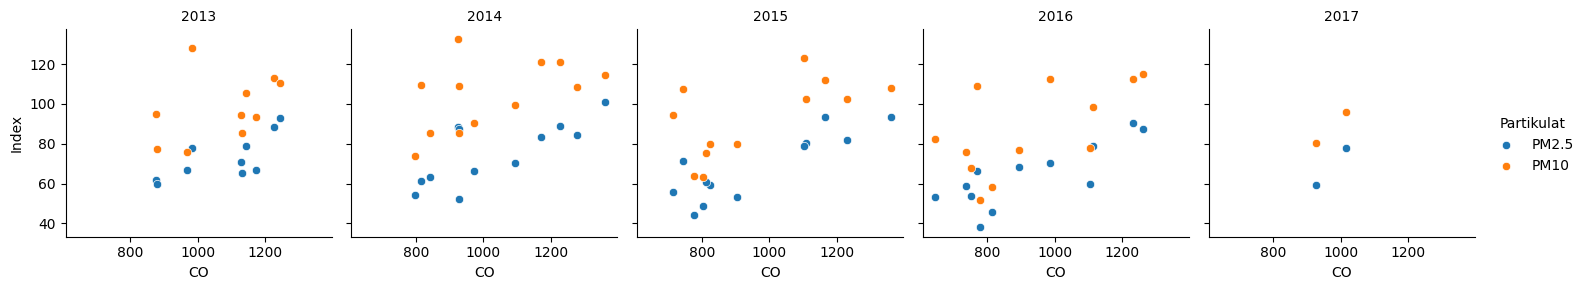

In [78]:
particle = final.groupby(['year','month'])[['NO2','SO2','CO','PM2.5','PM10']].mean().reset_index()
print(particle)
for var in ['NO2','SO2','CO']:
    particle = pd.melt(
        particle,
        id_vars=['year','month', var], 
        value_vars=('PM2.5','PM10'), 
        var_name='Partikulat', 
        value_name='Index', 
        col_level=None
    )
    print(particle)
    #g = sns.scatterplot(x=var, y="Index", hue='Partikulat', data=particle)
    g = sns.FacetGrid(particle, col='year', hue='Partikulat')
    g.map_dataframe(sns.scatterplot, x=var, y='Index')
    g.set_axis_labels(var, 'Index')
    g.set_titles(col_template='{col_name}')
    g.add_legend()
    plt.show()
    particle = final.groupby(['year','month'])[['NO2','SO2','CO','PM2.5','PM10']].mean().reset_index()

### Pertanyaan 5a

- Pertanyaan 5 disajikan dalam diagram bar agar terlihat seberapa besar tiap daerah menghasilkan polusi tiap tahunnya.

    year        station        NO2
0   2017         Wanliu  61.493997
1   2017   Aotizhongxin  59.508475
2   2017       Guanyuan  59.486582
3   2017        Tiantan  59.426907
4   2017  Wanshouxigong  57.999294
..   ...            ...        ...
55  2013        Tiantan  51.961961
56  2013         Shunyi  41.121158
57  2013      Changping  40.401188
58  2013        Huairou  34.517787
59  2013       Dingling  28.393317

[60 rows x 3 columns]


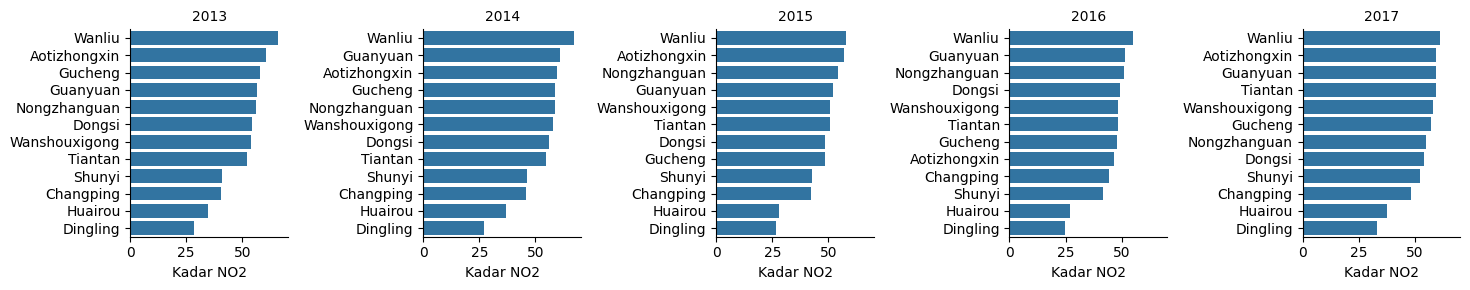

    year       station        SO2
0   2017        Shunyi  16.526836
1   2017       Gucheng  16.368997
2   2017        Wanliu  16.319915
3   2017  Aotizhongxin  15.955862
4   2017        Dongsi  15.858757
..   ...           ...        ...
55  2013       Tiantan  12.996164
56  2013       Huairou  12.543252
57  2013       Gucheng  12.444319
58  2013      Dingling  10.908924
59  2013        Shunyi  10.845286

[60 rows x 3 columns]


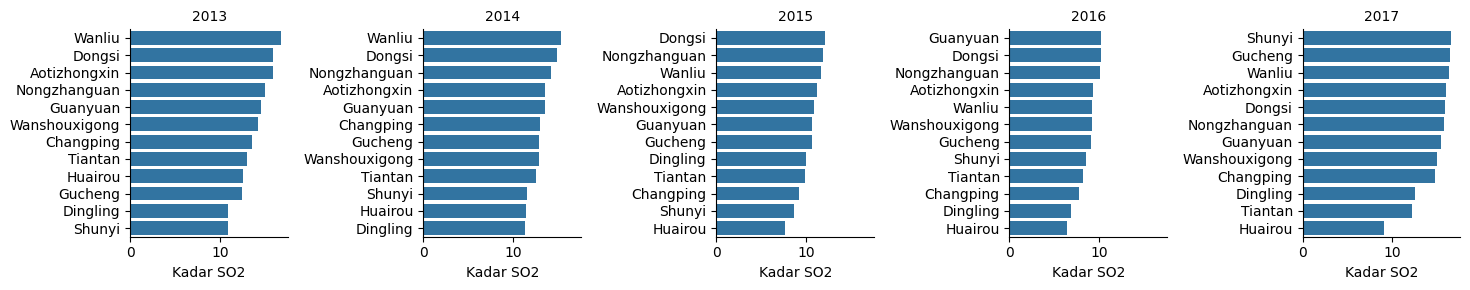

    year        station           CO
0   2017        Gucheng  1062.676554
1   2017        Tiantan  1014.583333
2   2017  Wanshouxigong  1014.300847
3   2017         Wanliu  1006.920904
4   2017         Shunyi   993.220339
..   ...            ...          ...
55  2013   Aotizhongxin  1035.407067
56  2013       Guanyuan  1017.630480
57  2013        Huairou   946.566653
58  2013      Changping   942.718273
59  2013       Dingling   915.744485

[60 rows x 3 columns]


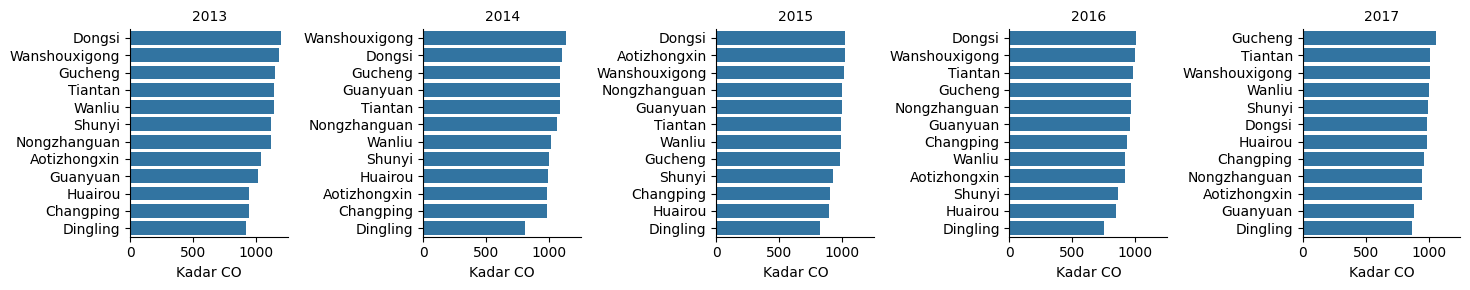

In [80]:
for var in ['NO2','SO2','CO']:
    rank = final.groupby(["year","station"])[[var]].mean().sort_values(['year',var], ascending=False).reset_index()
    print(rank)
    g = sns.FacetGrid(rank, col='year', sharey=None)
    g.map_dataframe(sns.barplot, x=var, y='station')
    g.set_axis_labels('Kadar {}'.format(var),'')
    g.set_titles(col_template='{col_name}')
    plt.show()

### Pertanyaan 5b:

    year        station        NO2
0   2013       Dingling  28.393317
1   2013        Huairou  34.517787
2   2013      Changping  40.401188
3   2013         Shunyi  41.121158
4   2013        Tiantan  51.961961
..   ...            ...        ...
55  2017  Wanshouxigong  57.999294
56  2017        Tiantan  59.426907
57  2017       Guanyuan  59.486582
58  2017   Aotizhongxin  59.508475
59  2017         Wanliu  61.493997

[60 rows x 3 columns]


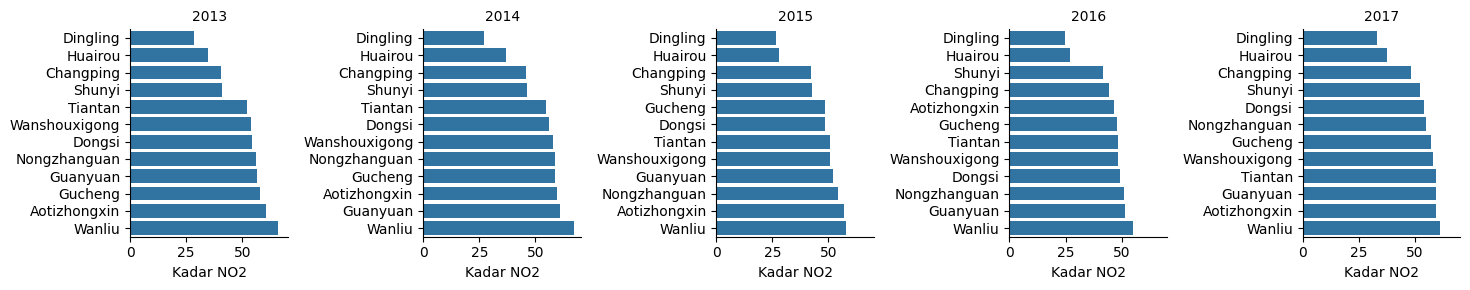

    year       station        SO2
0   2013        Shunyi  10.845286
1   2013      Dingling  10.908924
2   2013       Gucheng  12.444319
3   2013       Huairou  12.543252
4   2013       Tiantan  12.996164
..   ...           ...        ...
55  2017        Dongsi  15.858757
56  2017  Aotizhongxin  15.955862
57  2017        Wanliu  16.319915
58  2017       Gucheng  16.368997
59  2017        Shunyi  16.526836

[60 rows x 3 columns]


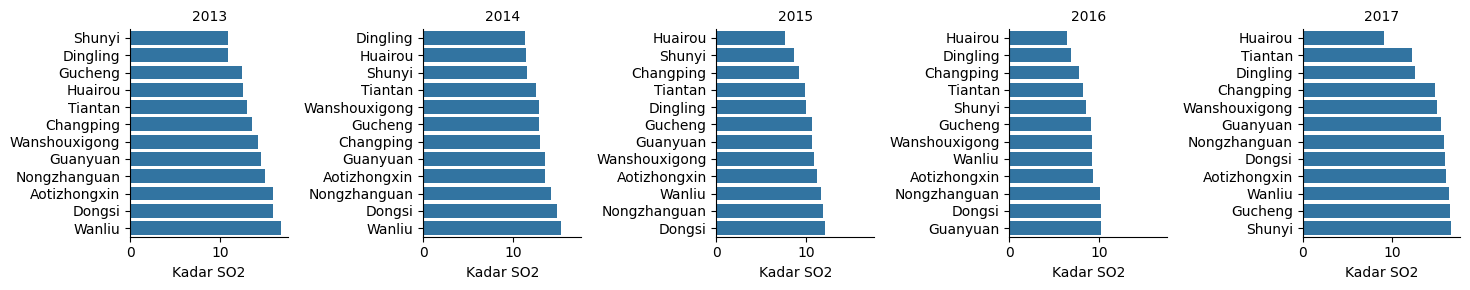

    year        station           CO
0   2013       Dingling   915.744485
1   2013      Changping   942.718273
2   2013        Huairou   946.566653
3   2013       Guanyuan  1017.630480
4   2013   Aotizhongxin  1035.407067
..   ...            ...          ...
55  2017         Shunyi   993.220339
56  2017         Wanliu  1006.920904
57  2017  Wanshouxigong  1014.300847
58  2017        Tiantan  1014.583333
59  2017        Gucheng  1062.676554

[60 rows x 3 columns]


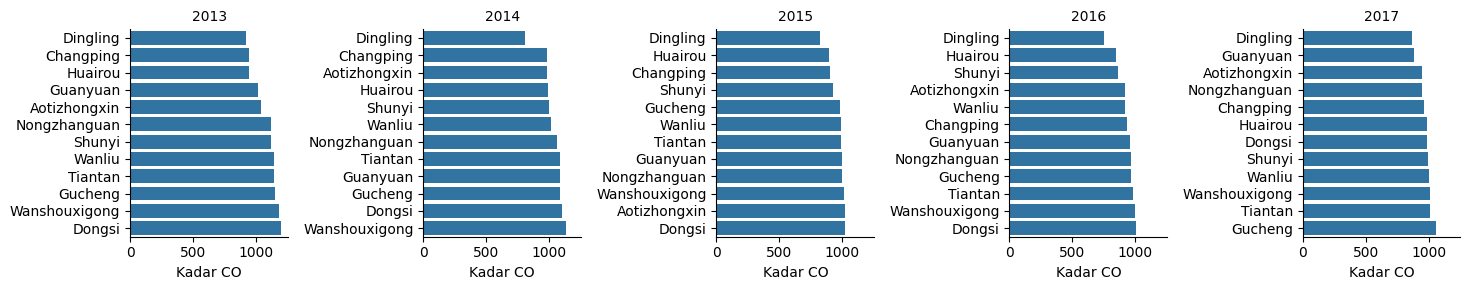

In [82]:
for var in ['NO2','SO2','CO']:
    rank = final.groupby(["year","station"])[[var]].mean().sort_values(['year',var], ascending=True).reset_index()
    print(rank)
    g = sns.FacetGrid(rank, col='year', sharey=None)
    g.map_dataframe(sns.barplot, x=var, y='station')
    g.set_axis_labels('Kadar {}'.format(var),'')
    g.set_titles(col_template='{col_name}')
    plt.show()

**Insight:**
- *Pertanyaan 1*  : Terlihat bahwa kurvatur variabel kadar gas **NO2** dipengaruhi oleh variable jam (**hour**), global minimum kemungkinan terletak di jam 15 dan global maxima di jam 22 sepanjang 4 tahun berturut-turut; serta dengan interval global minima terjadi di selang 9 < jam < 15 dan global maxima di selang 15 < jam < 22. Kadar **SO2** memiliki kurvatur yang berlawanan terhadap kurvatur **NO2** namun konsisten sepanjang tahun. Selama 4 tahun, global minima terletak di jam 6, sementara global maxima berada di antara jam 10 dan 12.
- *Pertanyaan 2*  : Selama 4 tahun, global maxima terletak di antara jam 7 atau 8, sementara global minima berada di jam 16.
- *Pertanyaan 3*  : Jika dilihat secara teliti, kurva **O3** memiliki tren yang cenderung naik ketika kurva **CO** mengalami tren negatif dari tahun 2013 hingga 2016, dan ketikan kadar **CO** naik secara drastis di tahun 2017, kadar **O3**pun ikut turun.
- *Pertanyaan 4*  : Dari sebaran titik **PM2.5** dan **PM10** terhadap **NO2**, **SO2**, dan **CO** dari tahun ke tahun terlihat sebuah tren positif dimana semakin besar nilai kadar gas, maka index **PM2.5** dan **PM10** secara proporsional akan besar pula.
- *Pertanyaan 5a* : Daerah Wanliu menjadi penghasil gas NO2 terbesar, Daerah Wanliu menjadi penghasil gas SO2 terbesar selama 2 tahun berturut-turut, namun disusul oleh Dongsi, Guanyuan, dan Shunyi di tahun berikutnya. Di tahun pertama Dongsi menjadi penghasil CO terbesar, namun disusul oleh Wanshouxigong di tahun berikutnya, tapi menjadi penghasil terbanyak kembali selama dua tahun sebelum disusul oleh Gucheng di 2017.
- *Pertanyaan 5b* : Dingling penghasil terkecil selama 4 tahun berturut-turut. Shunyi dan Dingling menjadi penghasil SO2 terkecil di tahun 2013 dan 2014, namun tahun berikutnya Huairou menjadi penghasil terkecil selama 3 tahun berturut-turut. Dingling menjadi penghasil CO terkecil selama 4 tahun berturut-turut.

## Conclusion

- ***Conclusion Pertanyaan 1***  : Negara China mengregulasikan jam kerja dari 9 pagi hingga 22 malam, berdasarkan kurva **NO2**, pada selang jam 9 hingga 22 memiliki arah yang cenderung negatif, dimana seharusnya aktivitas industri menghasilkan arah yang positif selama interval tersebut, sebaliknya kurva **SO2** mengalami arah yang positif dan cenderung konsisten selama interval tersebut, gas NO2 dihasilkan paling tinggi di jam 22 dan paling rendah di NO2 selama 4 tahun, sementara gas SO2 paling tinggi di jam 10 atau 11 dan paling rendah di jam 5 selama 4 tahun.
- ***Conclusion Pertanyaan 2***  : Kurva **CO** memuncak di antara jam 7 dan 8, serta di jam 22, hal ini sesuai dengan fakta bahwa jam 7 merupakan jam sekolah di China, dapat diasumsikan bahwa lonjakan ini berasal dari para orangtua yang mengantarkan anak-anaknya menggunakan kendaraan baik itu mobil ataupun motor, dan di saat yang bersamaan para orangtua juga pergi untuk bekerja, ketika mereka tiba di kantor/pabrik, kendaraan mereka dalam keadaan terparkir, dalam kata lain mesin dalam keadaan mati, hal ini dapat dilihat dari kurva yang cenderung berarah negatif dari selang jam 9 hingga jam 16. Setelah usai bekerja, merekapun kembali pulang, situasi ini ditandai pada titik ekstrim kurva di jam 22, dimana jam tersebut merupakan jam pulang kerja, sehingga kadar CO kembali naik.
- ***Conclusion Pertanyaan 3***  : Berdasarkan hasil plot, dapat terlihat hubungan yang proporsional antara kadar **CO** terhadap **O3**.
- ***Conclusion Pertanyaan 4***  : Hasil sebaran titik untuk semua gas terhadap index PM2.5 dan PM10 memiliki hubungan yang positif dan cenderung paling tinggi di tahun 2015.
- ***Conclusion Pertanyaan 5*** : Secara tren, daerah Wanliu penghasil NO2 terbanyak selama 4 tahun, 2 tahun SO2 terbanyak, sementara Dongsi penghasil CO terbanyak sebanyak 2 kali. Daerah Dingling penghasil NO2 dan CO terkecil selama 4 tahun, sementara Huairiaou penghasil SO2 terkecil.